# 📚 Análisis Exploratorio de Datos "Predicting Effective Arguments"

En este cuaderno realizaremos un análisis exploratorio de datos (EDA) del conjunto de ensayos proporcionado. Exploraremos las variables disponibles, detectaremos valores faltantes o duplicados, analizaremos la distribución de variables categóricas y cuantitativas, y extraeremos conclusiones que nos ayuden a entender mejor los datos.

## 📦 Carga de Librerías

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For word cloud
from wordcloud import WordCloud

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

# NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')

# Set seaborn style
sns.set(style="whitegrid")

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 📥 Carga de Datos

In [2]:
# Load data
essay_data = pd.read_csv('data/train.csv')

---

## 🔎 Análisis Exploratorio de Datos

### 1️⃣ Descripción General del Conjunto de Datos

Primero, veamos las primeras filas del conjunto de datos para tener una idea de su estructura:

In [3]:
essay_data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate


El conjunto de datos contiene **5 columnas**:

- `discourse_id`: Identificador único de cada elemento discursivo.
- `essay_id`: Identificador del ensayo al que pertenece el elemento discursivo.
- `discourse_text`: Texto del elemento discursivo.
- `discourse_type`: Tipo de elemento discursivo (por ejemplo, 'Lead', 'Position', etc.).
- `discourse_effectiveness`: Clasificación de la efectividad del discurso ('Effective', 'Adequate', 'Ineffective').


Ahora, revisemos información detallada sobre las variables:

In [4]:
essay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


Observamos que el conjunto de datos tiene 36765 observaciones y 5 variables. Todas las variables están completas, sin valores nulos.

In [5]:
print(essay_data.info()) # Missing values

print(essay_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36765 entries, 0 to 36764
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   discourse_id             36765 non-null  object
 1   essay_id                 36765 non-null  object
 2   discourse_text           36765 non-null  object
 3   discourse_type           36765 non-null  object
 4   discourse_effectiveness  36765 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB
None
        discourse_id      essay_id  \
count          36765         36765   
unique         36765          4191   
top     0013cc385424  91B1F82B2CF1   
freq               1            23   

                                     discourse_text discourse_type  \
count                                         36765          36765   
unique                                        36691              7   
top     Summer projects should be student-designed        Evidence   
freq 

### 2️⃣ Valores Faltantes y Duplicados

Comprobamos si existen valores faltantes en el conjunto de datos:

In [6]:
missing_values = essay_data.isnull().sum()
print("Valores faltantes:\n", missing_values)

Valores faltantes:
 discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
dtype: int64


No hay valores faltantes en ninguna de las variables. Ahora, verificamos si existen filas duplicadas:

In [7]:
duplicate_rows = essay_data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")

Número de filas duplicadas: 0


El número de filas duplicadas es 0, por lo que no es necesario realizar acciones adicionales en este aspecto.

### 3️⃣ Distribución de la Variable `discourse_effectiveness`

Analizamos la distribución de la variable categórica `discourse_effectiveness`:

In [8]:
class_distribution = essay_data['discourse_effectiveness'].value_counts()
print("Distribución de la efectividad del discurso:")
print(class_distribution)

Distribución de la efectividad del discurso:
discourse_effectiveness
Adequate       20977
Effective       9326
Ineffective     6462
Name: count, dtype: int64


Visualizamos esta distribución con un gráfico de barras:

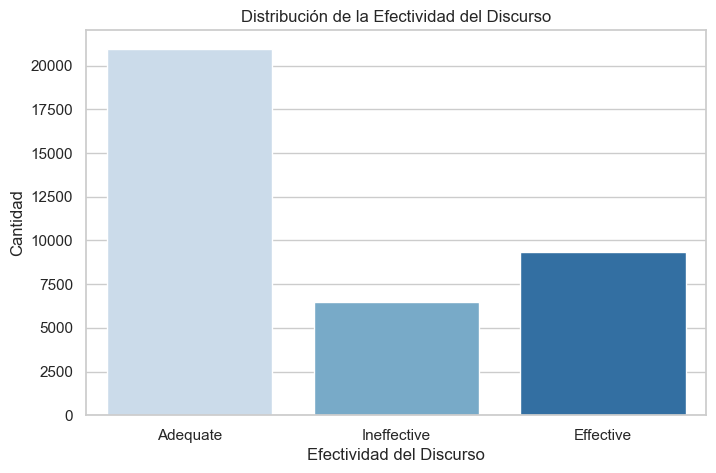

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='discourse_effectiveness', data=essay_data, palette='Blues')
plt.title('Distribución de la Efectividad del Discurso')
plt.xlabel('Efectividad del Discurso')
plt.ylabel('Cantidad')
plt.show()

Observamos que la mayoría de los elementos discursivos están clasificados como 'Adequate', seguido de 'Effective', mientras que hay menos clasificados como 'Ineffective'.

### 4️⃣ Distribución de la Variable `discourse_type`

Analizamos la distribución de los tipos de discurso:

In [10]:
discourse_type_distribution = essay_data['discourse_type'].value_counts()
print("Distribución de los tipos de discurso:")
print(discourse_type_distribution)

Distribución de los tipos de discurso:
discourse_type
Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: count, dtype: int64


Visualizamos esta distribución:

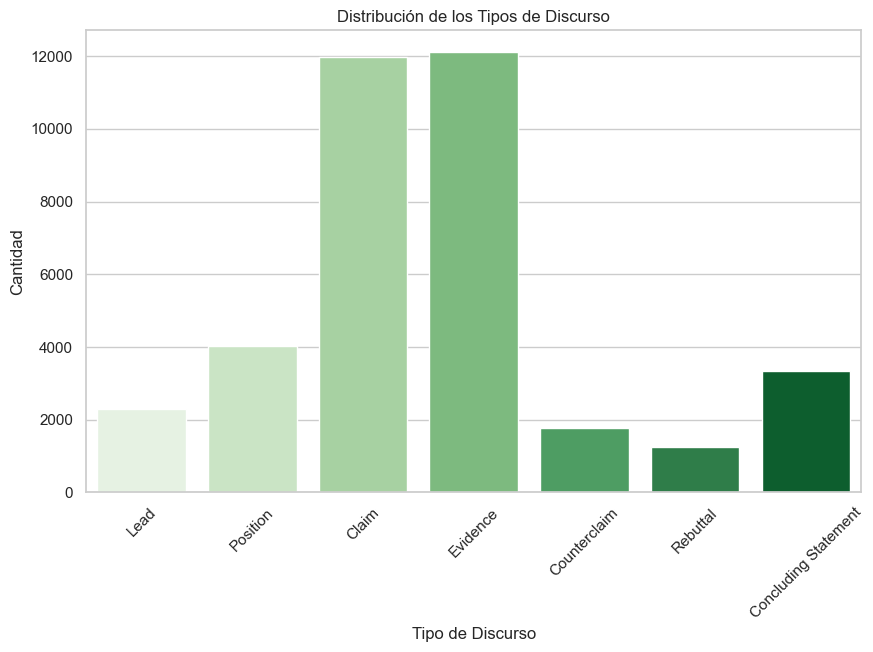

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='discourse_type', data=essay_data, palette='Greens')
plt.title('Distribución de los Tipos de Discurso')
plt.xlabel('Tipo de Discurso')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Notamos que ciertos tipos de discurso, como 'Evidence' y 'Claim', son más frecuentes en los ensayos.

### 5️⃣ Análisis Conjunto de `discourse_type` y `discourse_effectiveness`

Creamos una tabla cruzada para analizar la relación entre el tipo de discurso y su efectividad:

In [12]:
cross_tab = pd.crosstab(essay_data['discourse_type'], essay_data['discourse_effectiveness'])
print("Tabla cruzada entre tipo de discurso y efectividad:")
print(cross_tab)

Tabla cruzada entre tipo de discurso y efectividad:
discourse_effectiveness  Adequate  Effective  Ineffective
discourse_type                                           
Claim                        7097       3405         1475
Concluding Statement         1945        825          581
Counterclaim                 1150        418          205
Evidence                     6064       2885         3156
Lead                         1244        683          364
Position                     2784        770          470
Rebuttal                      693        340          211


Visualizamos esta relación con un gráfico de barras apiladas:

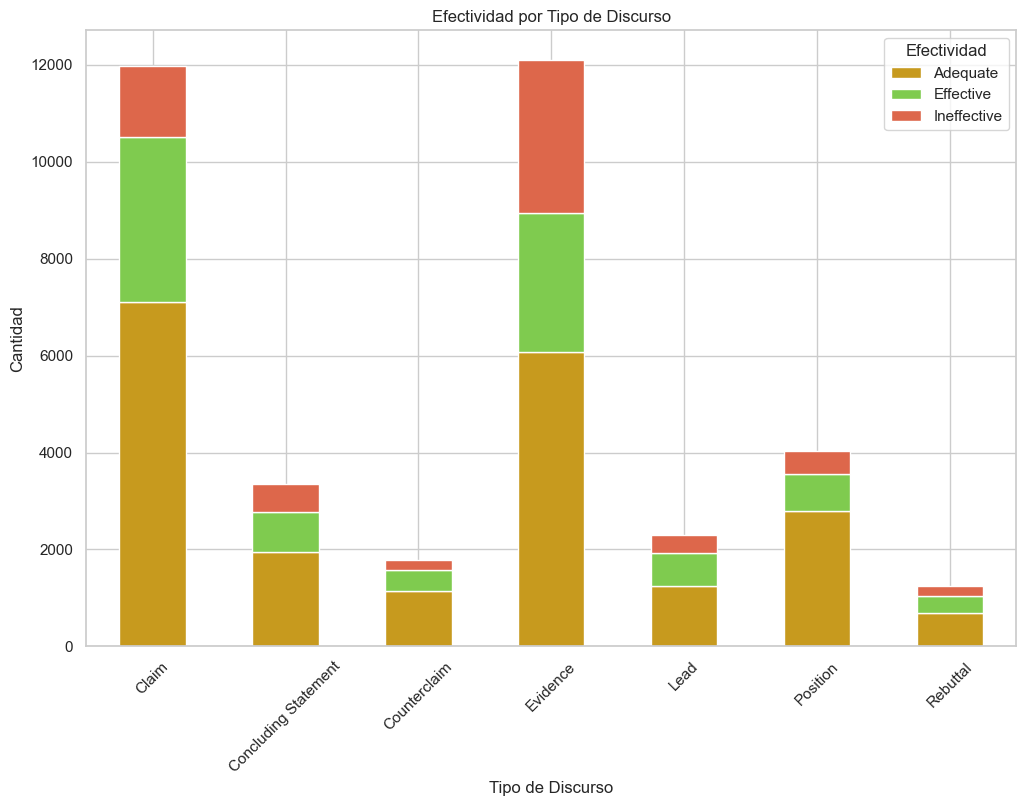

In [13]:
color_mapping = {'Adequate': '#c79a1e',  # light yellow
                            'Effective': '#7fcb4f',  # light green
                            'Ineffective': '#dd674b'}  # light red/pink

# Create the bar plot with the updated color mapping
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), color=[color_mapping[col] for col in cross_tab.columns])

# Add titles and labels
plt.title('Efectividad por Tipo de Discurso')
plt.xlabel('Tipo de Discurso')
plt.ylabel('Cantidad')
plt.legend(title='Efectividad')
plt.xticks(rotation=45)

# Display the plot
plt.show()

### 6️⃣ Análisis de la Longitud del Texto

Creamos una variable cuantitativa, `text_length`, que mide la longitud del texto de cada elemento discursivo:

In [14]:
essay_data['text_length'] = essay_data['discourse_text'].apply(len)

Calculamos estadísticas descriptivas de esta variable:

In [15]:
text_length_summary = essay_data['text_length'].describe()
print("Estadísticas descriptivas de la longitud del texto:")
print(text_length_summary)

Estadísticas descriptivas de la longitud del texto:
count    36765.000000
mean       249.319652
std        262.652668
min          4.000000
25%         87.000000
50%        155.000000
75%        315.000000
max       4099.000000
Name: text_length, dtype: float64


Visualizamos la distribución de la longitud del texto:

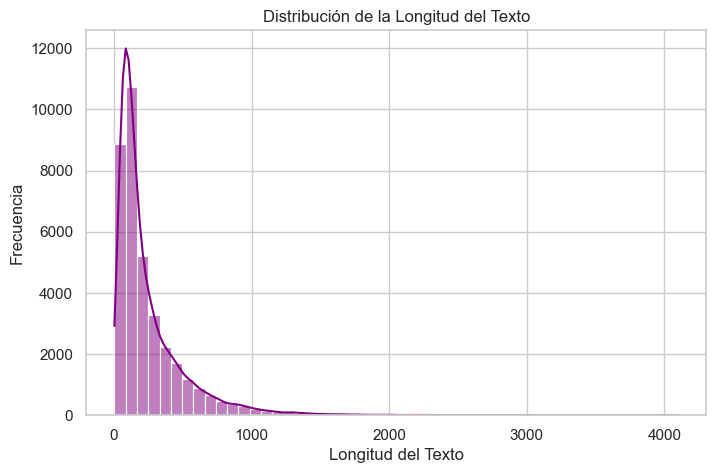

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(essay_data['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribución de la Longitud del Texto')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

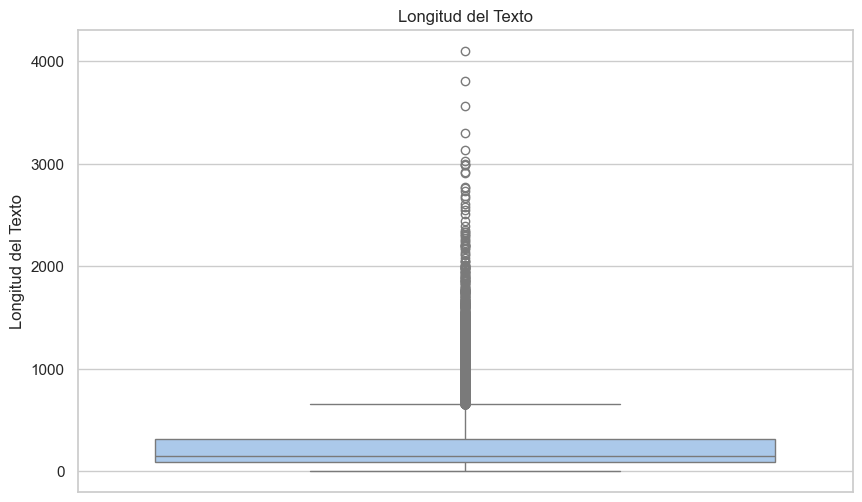

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(y='text_length', data=essay_data, palette='pastel')
plt.title('Longitud del Texto')
plt.ylabel('Longitud del Texto')
plt.show()

Ahora, analizamos la relación entre la longitud del texto y la efectividad del discurso:

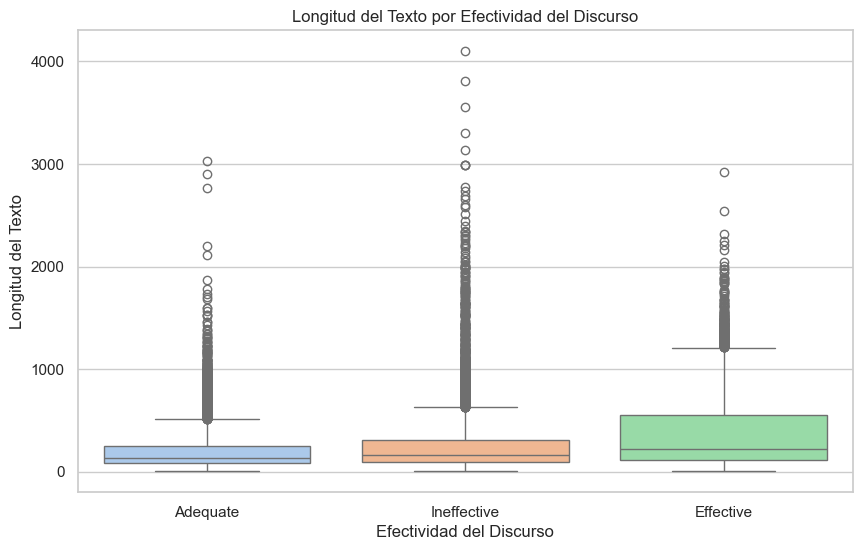

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='discourse_effectiveness', y='text_length', data=essay_data, palette='pastel')
plt.title('Longitud del Texto por Efectividad del Discurso')
plt.xlabel('Efectividad del Discurso')
plt.ylabel('Longitud del Texto')
plt.show()

Observamos que los discursos 'Effective' tienden a tener mayor longitud en promedio que los 'Ineffective'.

### 7️⃣ Análisis de Ensayos y Elementos Discursivos

Contamos el número de ensayos únicos:

In [18]:
unique_essays = essay_data['essay_id'].nunique()
print(f"Número de ensayos únicos: {unique_essays}")

Número de ensayos únicos: 4191


Analizamos la cantidad de elementos discursivos por ensayo:

In [19]:
discourse_per_essay = essay_data.groupby('essay_id')['discourse_id'].count()
print("Estadísticas descriptivas de elementos discursivos por ensayo:")
print(discourse_per_essay.describe())

Estadísticas descriptivas de elementos discursivos por ensayo:
count    4191.000000
mean        8.772369
std         3.492605
min         1.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        23.000000
Name: discourse_id, dtype: float64


Visualizamos la distribución:

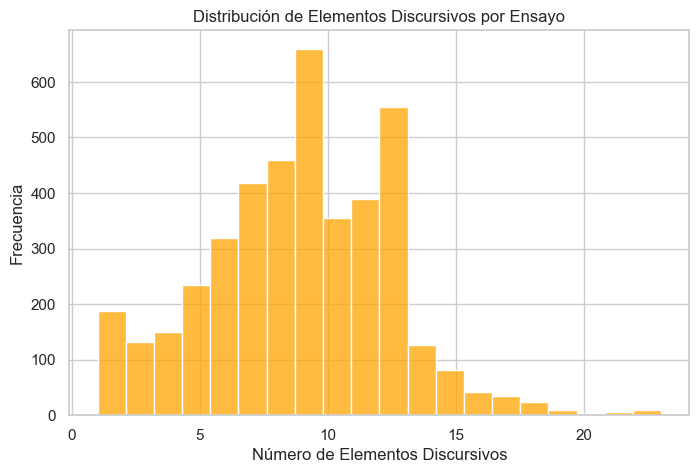

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(discourse_per_essay, bins=20, color='orange')
plt.title('Distribución de Elementos Discursivos por Ensayo')
plt.xlabel('Número de Elementos Discursivos')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los ensayos contienen entre 8 y 11 elementos discursivos.

### 8️⃣ Nube de Palabras para Discursos Efectivos

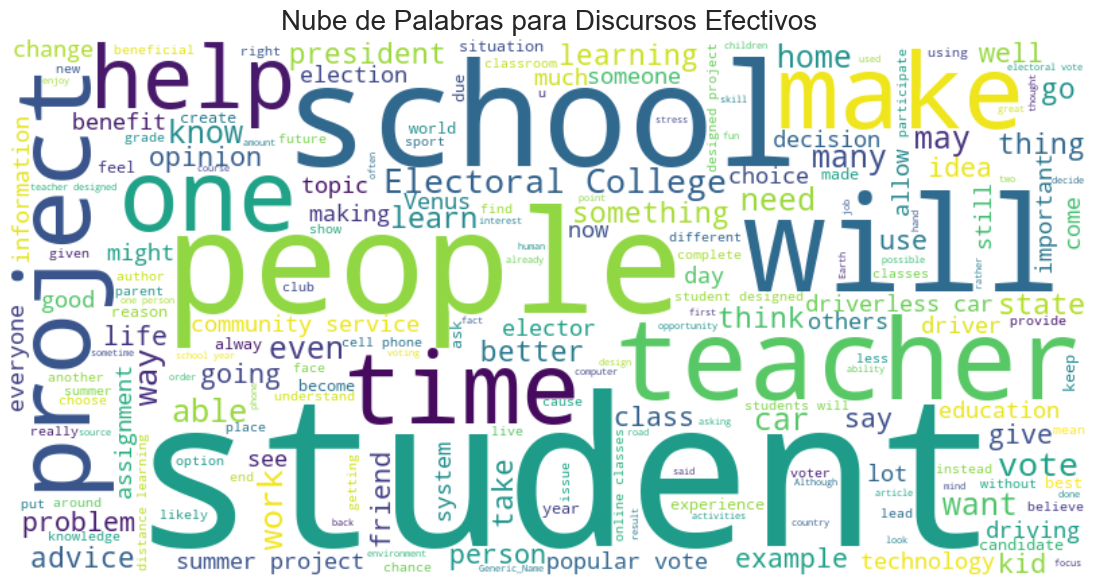

In [21]:
effective_text = " ".join(essay_data[essay_data['discourse_effectiveness'] == 'Effective']['discourse_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(effective_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Discursos Efectivos', fontsize=20)
plt.show()

---

## 🧹 Preprocesamiento de Datos

En esta sección, realizamos tareas de limpieza y preprocesamiento del texto para prepararlo para análisis posteriores.

### Tareas de Preprocesamiento Realizadas:

1. **Conversión a minúsculas**: Para uniformizar el texto.
2. **Eliminación de caracteres especiales y números**: Para limpiar el texto de elementos no deseados.
3. **Tokenización**: División del texto en palabras individuales.
4. **Eliminación de stopwords**: Remoción de palabras comunes que no aportan significado relevante.
5. **Eliminación de puntuación**: Para centrarnos en las palabras significativas.
6. **Reconstrucción del texto**: Unión de las palabras procesadas en un solo string.

In [22]:
data = essay_data.copy()

def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text (split into words)
    tokens = word_tokenize(text)

    # 4. Remove stopwords (common words like 'the', 'is')
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Remove punctuation
    tokens = [word for word in tokens if word not in punctuation]

    # 6. Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the discourse_text
data['text'] = data['discourse_text'].apply(preprocess_text)

data.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,text_length,text
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,317,hi im isaac im going writing face mars natural...
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,210,perspective think face natural landform dont t...
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,105,think face natural landform life mars descover...
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,362,life mars would know reason think natural land...
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,101,people thought face formed alieans thought lif...


### 🫂 Análisis de Correlaciones y Outliers


Para analizar la correlación entre la longitud del texto y la efectividad del discurso, primero necesitamos codificar la variable categórica discourse_effectiveness en valores numéricos.

In [28]:
# Map 'discourse_effectiveness' to numerical values
effectiveness_mapping = {'Ineffective': 0, 'Adequate': 1, 'Effective': 2}
essay_data['effectiveness_score'] = essay_data['discourse_effectiveness'].map(effectiveness_mapping)

In [29]:
# Calculate Pearson correlation coefficient
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(essay_data['text_length'], essay_data['effectiveness_score'])
print(f"Coeficiente de correlación de Pearson: {correlation_coefficient:.4f}")
print(f"Valor p: {p_value:.4e}")

Coeficiente de correlación de Pearson: 0.1521
Valor p: 3.3558e-189


Para identificar outliers en la longitud del texto, podemos visualizar los datos y establecer un umbral, por ejemplo, textos con más de 1,000 caracteres.

In [30]:
# Identify outliers in 'text_length'
outlier_threshold = 1000
outliers = essay_data[essay_data['text_length'] > outlier_threshold]
print(f"Número de outliers (text_length > {outlier_threshold}): {len(outliers)}")

# Percentage of outliers
percentage_outliers = len(outliers) / len(essay_data) * 100
print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

Número de outliers (text_length > 1000): 820
Porcentaje de outliers: 2.23%


---

## 📊 Insights

- **Distribución de la Efectividad**: La mayoría de los elementos discursivos son clasificados como 'Adequate', indicando un nivel aceptable de efectividad en los ensayos. Sin embargo, hay oportunidades para aumentar la proporción de discursos 'Effective'.

- **Tipos de Discurso**: Los tipos 'Evidence' y 'Claim' son los más frecuentes, lo que sugiere que los ensayos enfatizan en proporcionar evidencia y realizar afirmaciones.

- **Relación entre Tipo y Efectividad**: Algunos tipos de discurso como 'Evidence' y 'Claim' tienen una mayor cantidad de discursos efectivos, mientras que otros como 'Rebuttal' muestran menos efectividad, lo que podría ser un área de mejora.

- **Longitud del Texto**: Existe una relación entre la longitud del texto y la efectividad del discurso; los discursos más largos tienden a ser más efectivos, posiblemente debido a una explicación más detallada.

- **Ensayos y Elementos Discursivos**: La cantidad de elementos discursivos varía entre ensayos, pero la mayoría contiene entre 8 y 10, lo que puede influir en la estructura y profundidad de los ensayos.

- **Nube de Palabras**: Las palabras más frecuentes en discursos efectivos pueden proporcionar insights sobre los temas y enfoques más exitosos.

---

## 🧪 Visualizaciones adicionales

### 1️⃣ Mapa de calor de la longitud media del texto por tipo de discurso y efectividad

Este mapa de calor muestra la longitud media del texto para cada combinación de `discourse_type` y `discourse_effectiveness`.

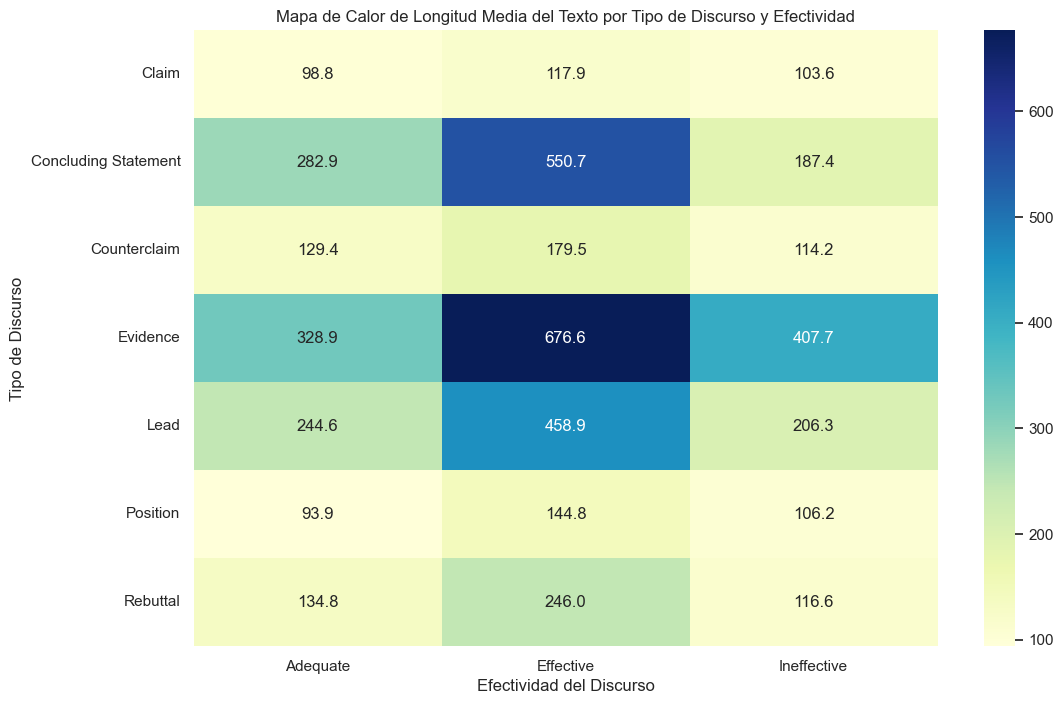

In [24]:
# Calculate average text length
pivot_table = essay_data.pivot_table(values='text_length', index='discourse_type', columns='discourse_effectiveness', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Mapa de calor de la longitud media del texto por tipo de discurso y efectividad')
plt.xlabel('Efectividad del discurso')
plt.ylabel('Tipo de discurso')
plt.show()

Esta visualización ayuda a identificar qué tipos de discurso y niveles de efectividad están asociados con textos más largos o más cortos. Como podemos ver los discursos efectivos suelen tener una mayor longitud.

### 2️⃣ Top Palabras Por Efectividad del Discurso

Gráficos de barras que muestran las palabras más comunes en cada categoría de `discourse_effectiveness`.

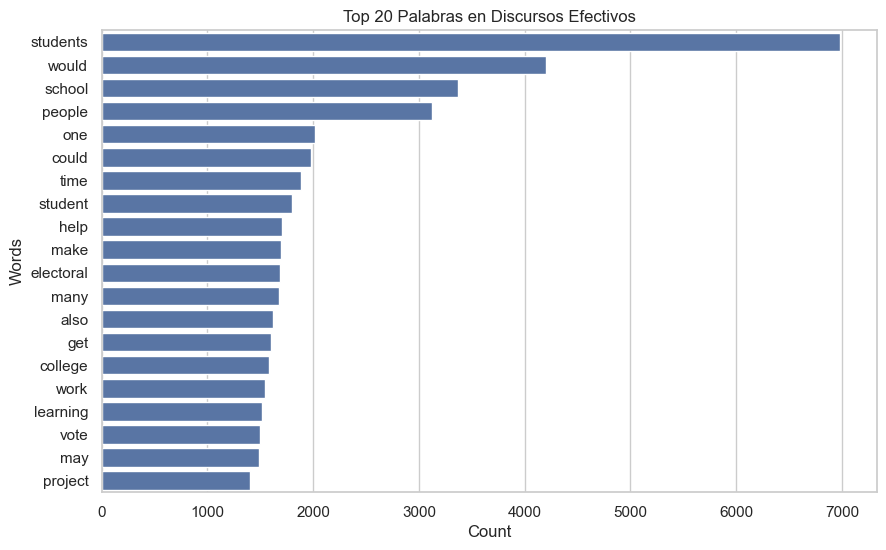

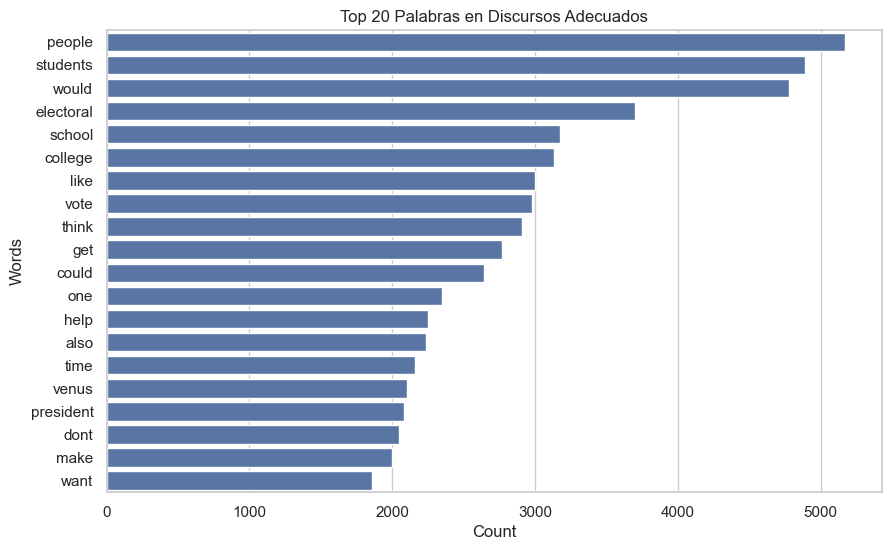

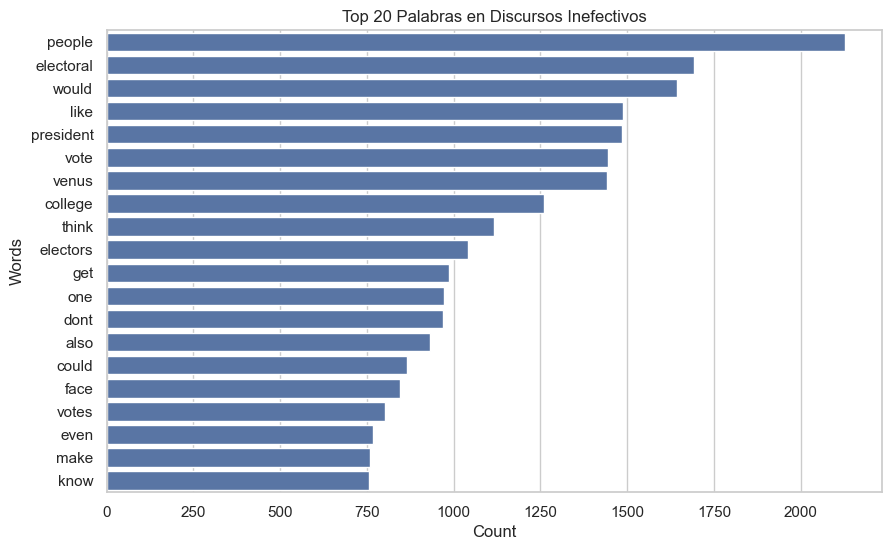

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function to get most common words
def get_most_common_words(text_series, num_words=20):
    all_words = ' '.join(text_series).lower()
    words = word_tokenize(all_words)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

# Plotting function
def plot_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabras')
    plt.show()

# Effective Discourse
common_words_effective = get_most_common_words(data[data['discourse_effectiveness'] == 'Effective']['text'])
plot_common_words(common_words_effective, 'Top 20 palabras en discursos efectivos')

# Adequate Discourse
common_words_adequate = get_most_common_words(data[data['discourse_effectiveness'] == 'Adequate']['text'])
plot_common_words(common_words_adequate, 'Top 20 palabras en discursos adecuados')

# Ineffective Discourse
common_words_ineffective = get_most_common_words(data[data['discourse_effectiveness'] == 'Ineffective']['text'])
plot_common_words(common_words_ineffective, 'Top 20 palabras en discursos inefectivos')

Estos gráficos ayudan a identificar temas o tópicos comunes dentro de cada categoría de efectividad. Aunque solo sabemos un poco sobre el contexto en el que se escribieron estos discuros, podemos rescatar que aparentemente los discursos efectivos apelan a un sector específico "estudiantes", quizá haciendo el mensaje más personal.